# Problem Statement:-

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table. Some relevant columns in the dataset:

• Date - The date of the observation

• AveragePrice - the average price of a single avocado

• type - conventional or organic

• year - the year

• Region - the city or region of the observation

• Total Volume - Total number of avocados sold

• 4046 - Total number of avocados with PLU 4046 sold

• 4225 - Total number of avocados with PLU 4225 sold

• 4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label The dataset can be seen in two angles to find the region and find the average price . Task: One of Classification and other of Regression Do both tasks in the same .ipynb file and submit at single file.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv(r'C:\Users\alvin\Downloads\avocado.csv.zip')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [7]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [13]:
df['Date']=pd.to_datetime(df['Date'])

In [9]:
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [10]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [11]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

<Axes: >

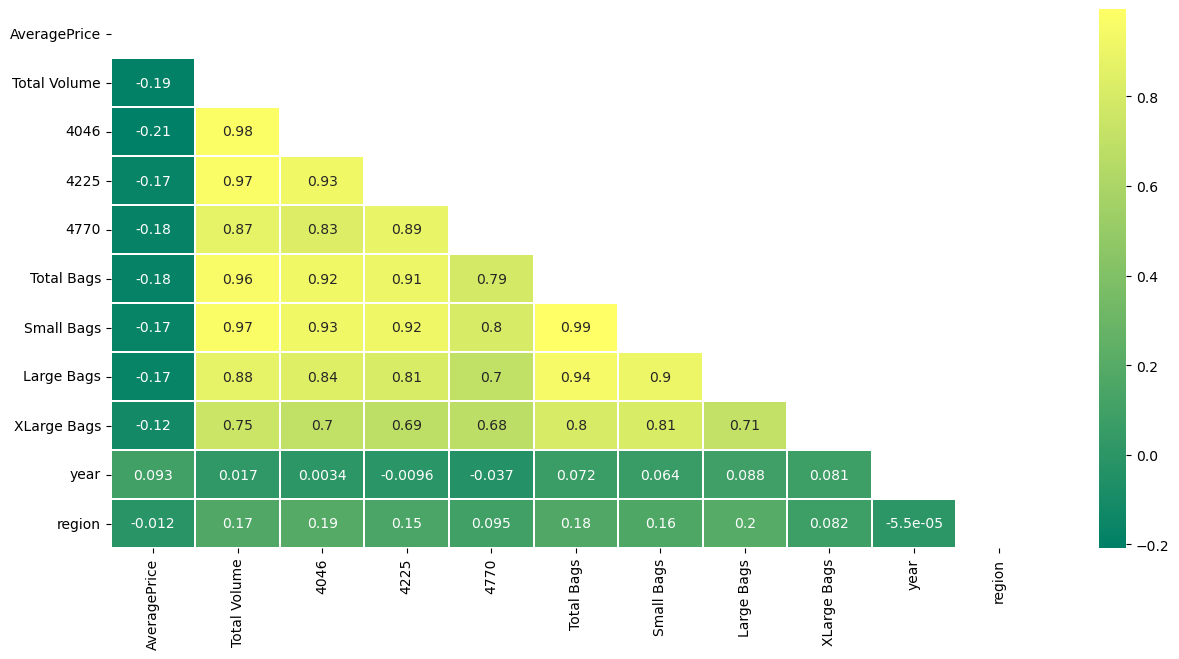

In [17]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,mask=np.triu(df.corr()),cmap='summer',linewidths=0.1 )

In [24]:
df['region'].nunique()

54

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['region']=le.fit_transform(df['region'])

In [22]:
df['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53], dtype=int64)

In [20]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [25]:
df.replace({'type':{'conventional':0,'organic':1}},inplace=True)

We have extracted the day,month and year from the 'Date' column, so now we will remove the column.

In [34]:
df['month']=pd.DatetimeIndex(df['Date']).month
df['date']=pd.DatetimeIndex(df['Date']).day

In [35]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,date
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


In [36]:
df=df.drop(columns=['Date'])

## Visualization 

<Axes: >

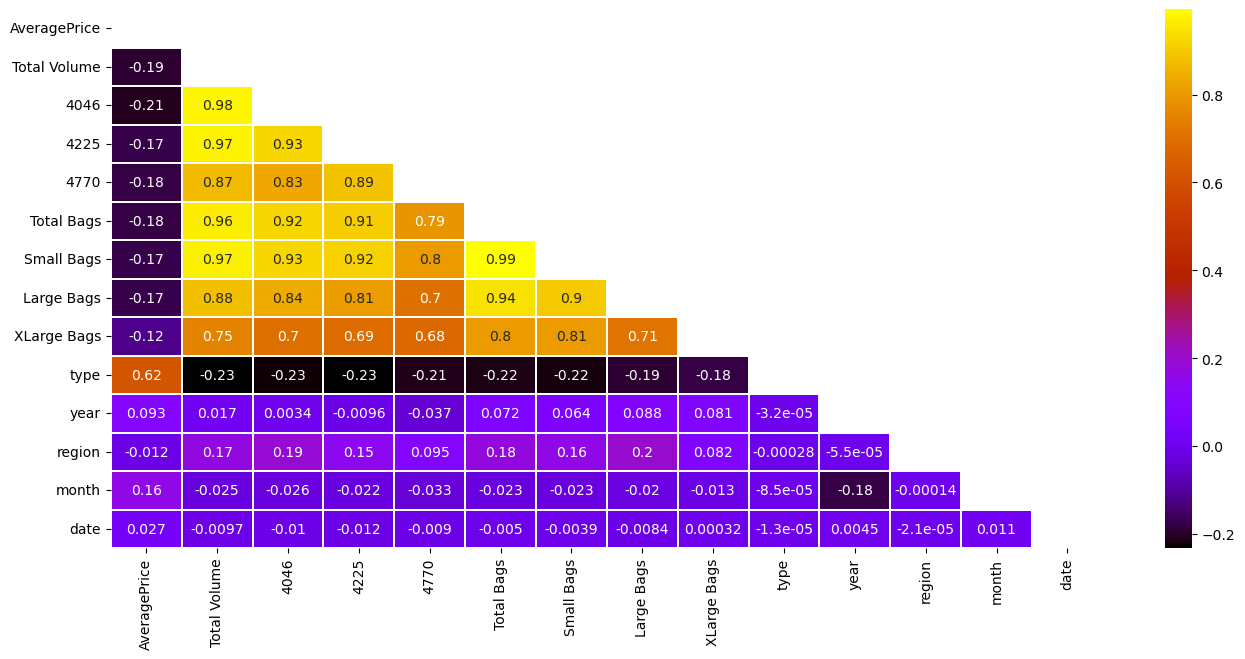

In [37]:
plt.figure(figsize=(16,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,mask=np.triu(df.corr()),cmap='gnuplot')

Columns '4046' and 'Total Volume' are highly correlated to each other columns '4225' and 'Total Volume' are also highly correlated. columns 'Small Bags' and 'Total Bags' Are very highly correlated to each other. columns 'Small Bags' and 'Total Volume' are also highly correlated with each other. There are various columns which are highly correlated with other, so we will remove some of the columns.

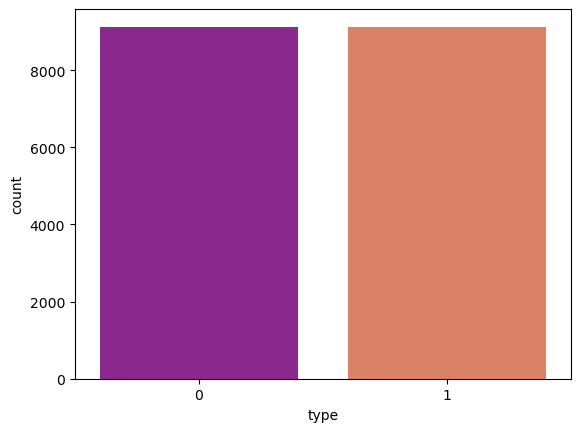

In [39]:
sns.countplot(x='type', data=df, palette="plasma")
plt.show()

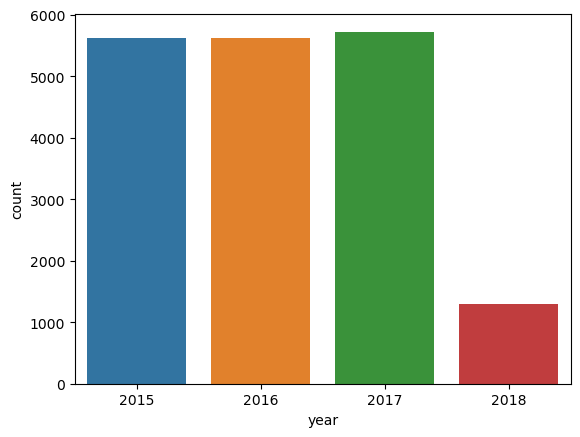

In [41]:
sns.countplot(x='year', data=df)
plt.show()

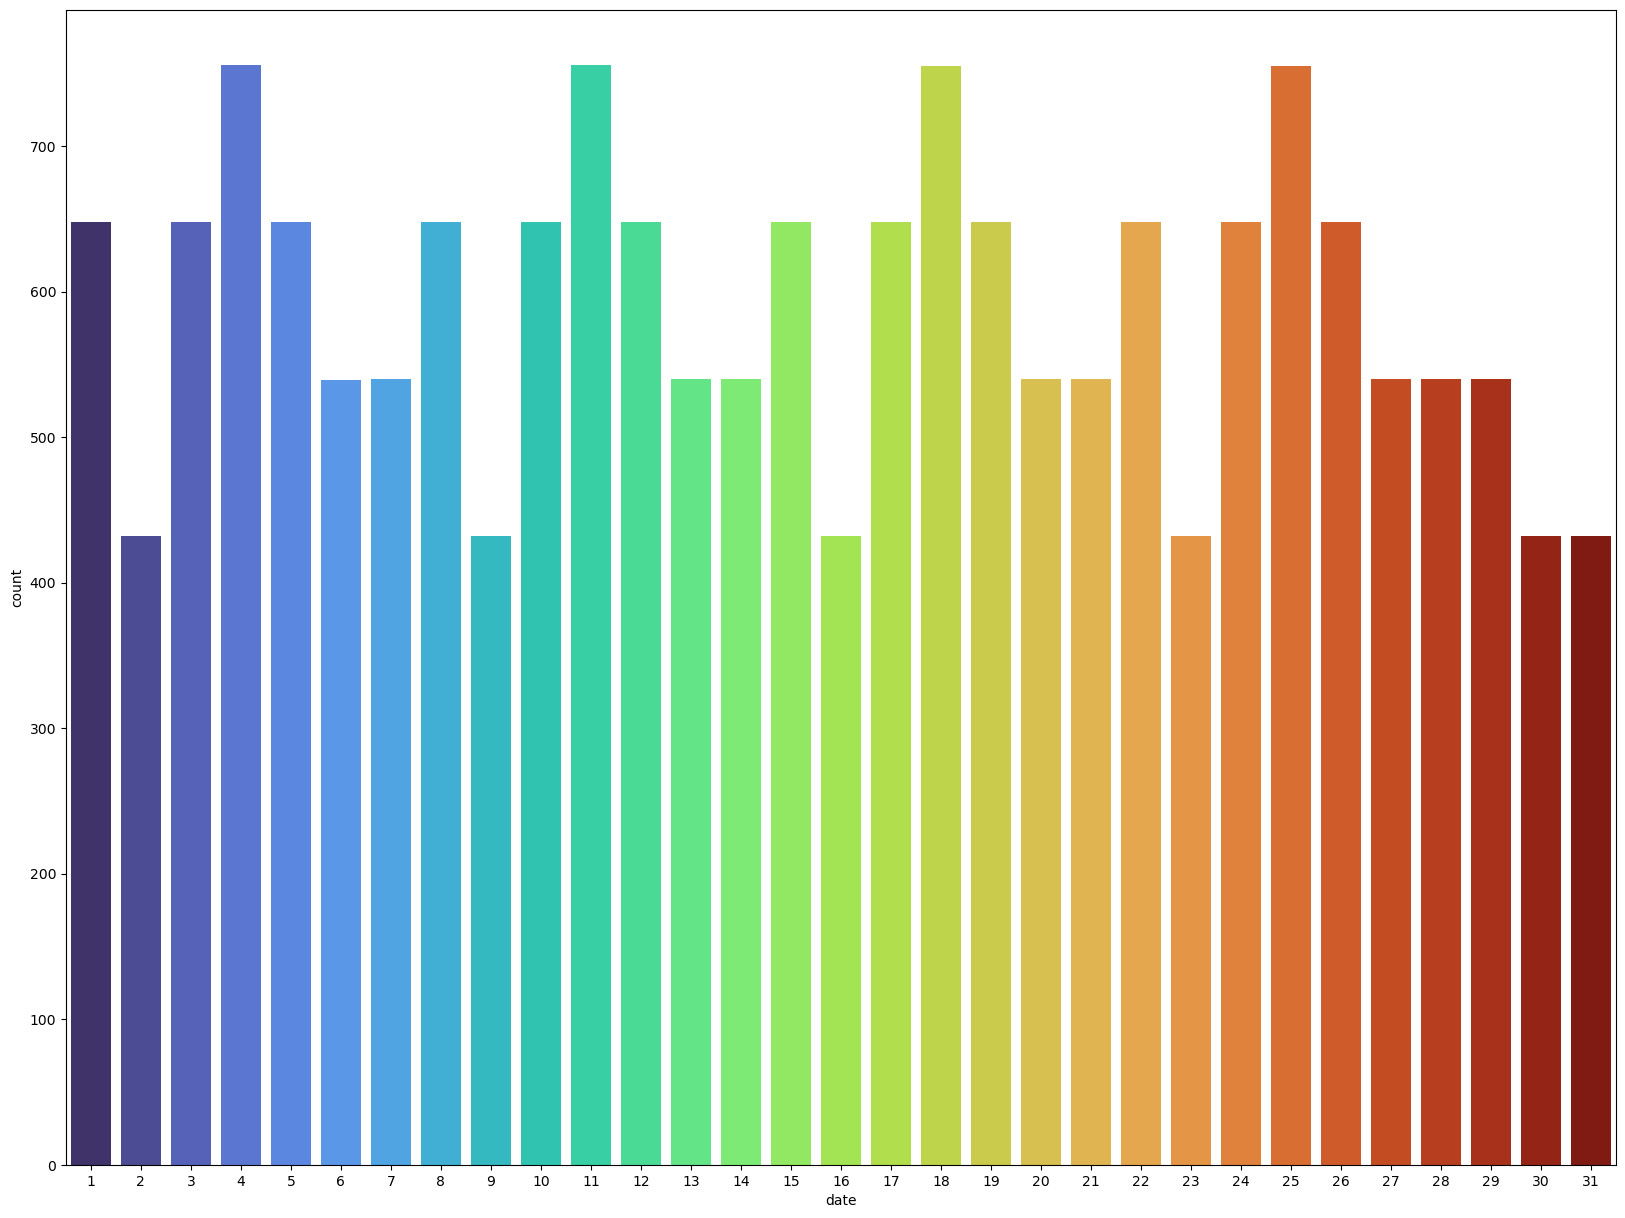

In [43]:
plt.figure(figsize=(20,15))
sns.countplot(x='date', data=df, palette="turbo")
plt.show()

<Figure size 1500x1000 with 0 Axes>

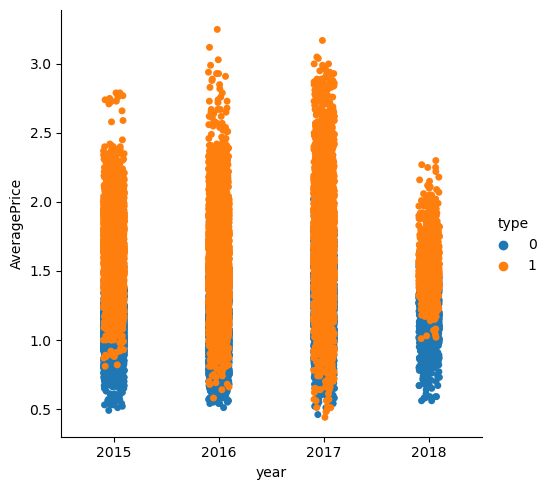

In [45]:
plt.figure(figsize=(15,10))
sns.catplot(x="year", y="AveragePrice", hue="type", data=df)
plt.show()

<Figure size 1500x1000 with 0 Axes>

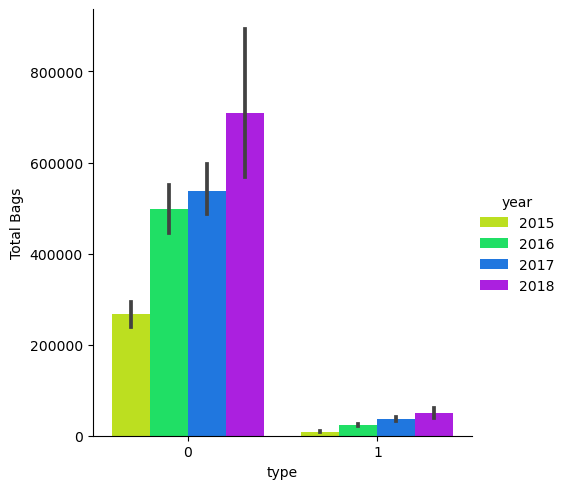

In [47]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Bags", hue="year", data=df, kind="bar", palette="hsv")
plt.show()

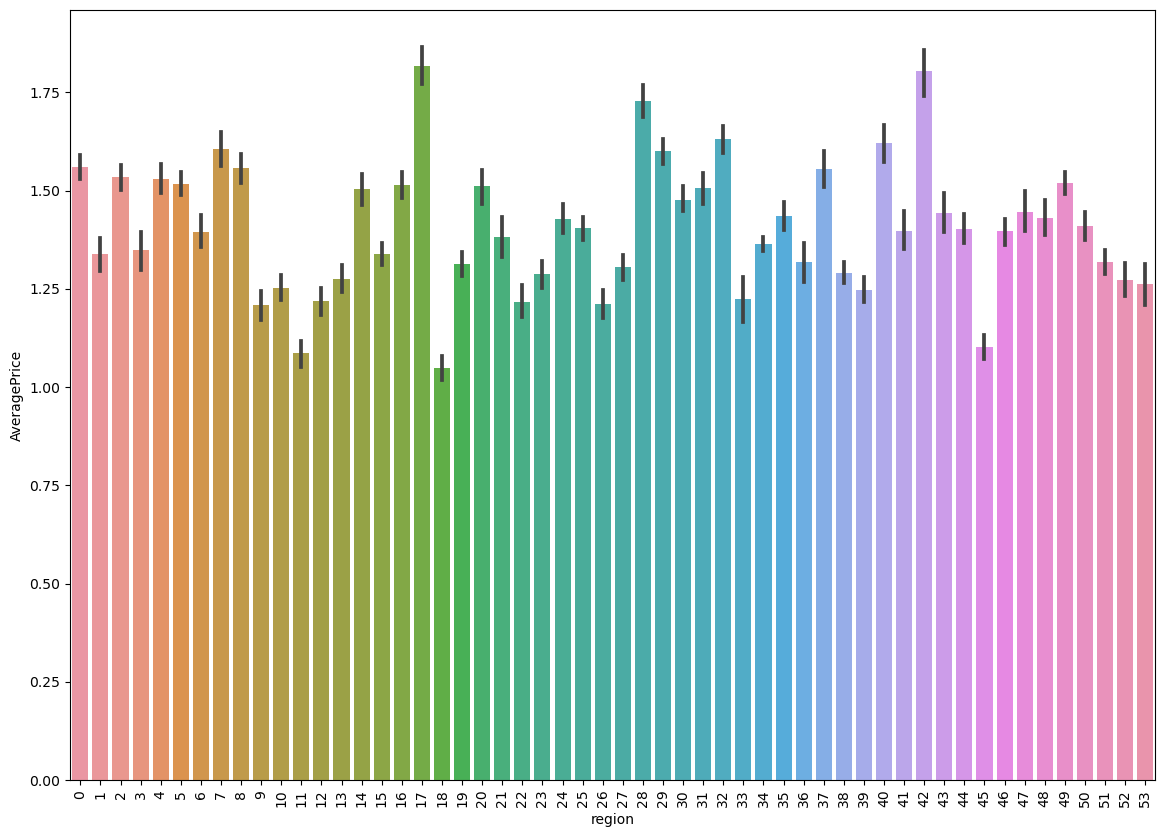

In [49]:
plt.figure(figsize=(14,10))
sns.barplot(x='region',y='AveragePrice',data=df)
plt.xticks(rotation=90)
plt.show()

In [51]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
month            0.106617
date             0.014310
dtype: float64

In [53]:
df.drop(columns=['4225','Total Volume','date'],inplace=True)

<Axes: >

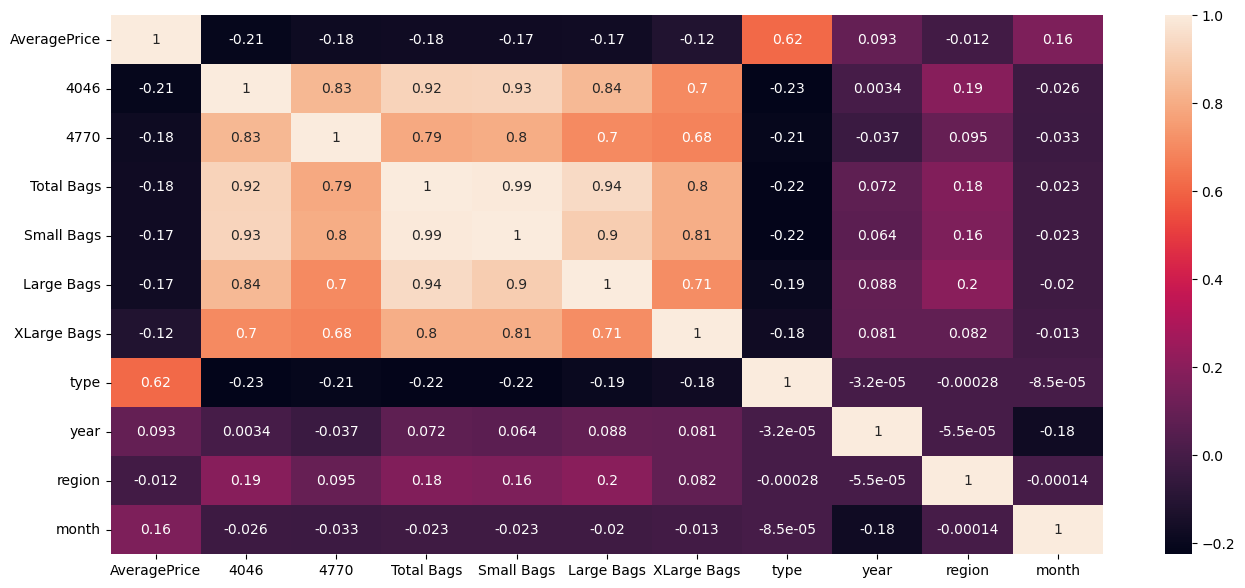

In [54]:
plt.figure(figsize=(16,7))
sns.heatmap(df.corr(),annot=True)

In [55]:
df.drop(columns=['Total Bags'],inplace=True)

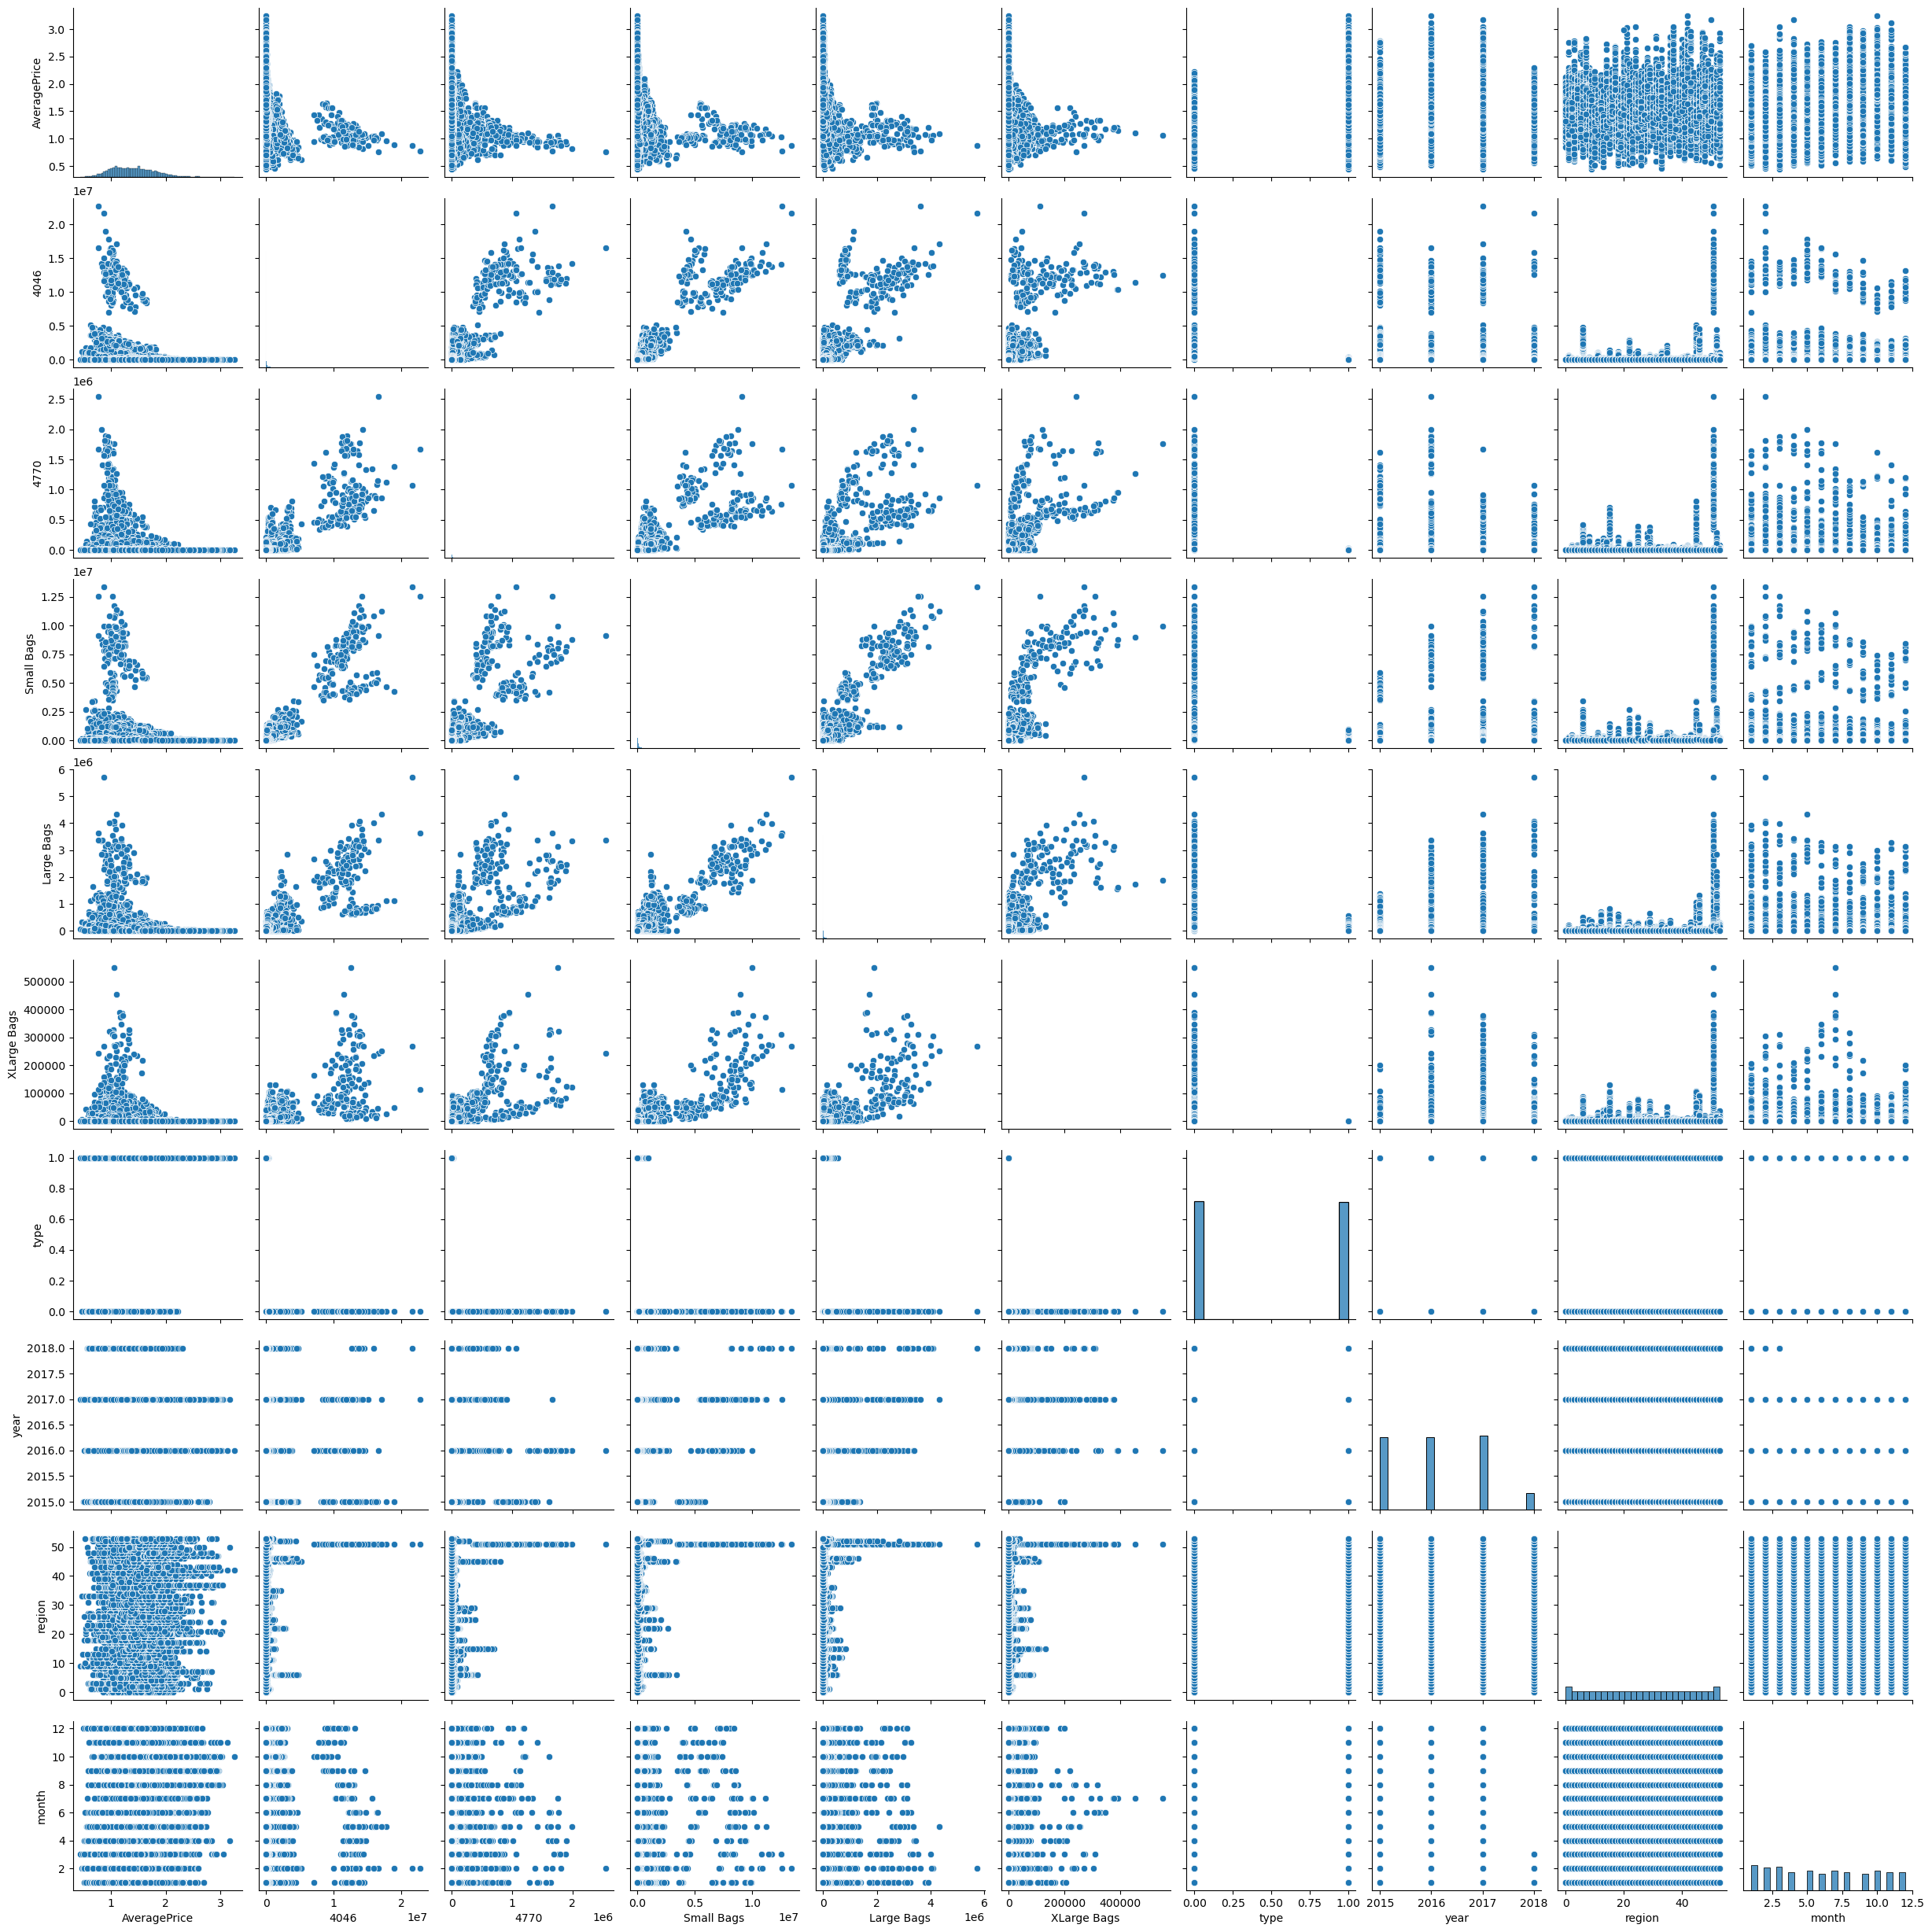

In [56]:
sns.pairplot(df)

In [57]:
df.skew()

AveragePrice     0.580303
4046             8.648220
4770            10.159396
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
month            0.106617
dtype: float64

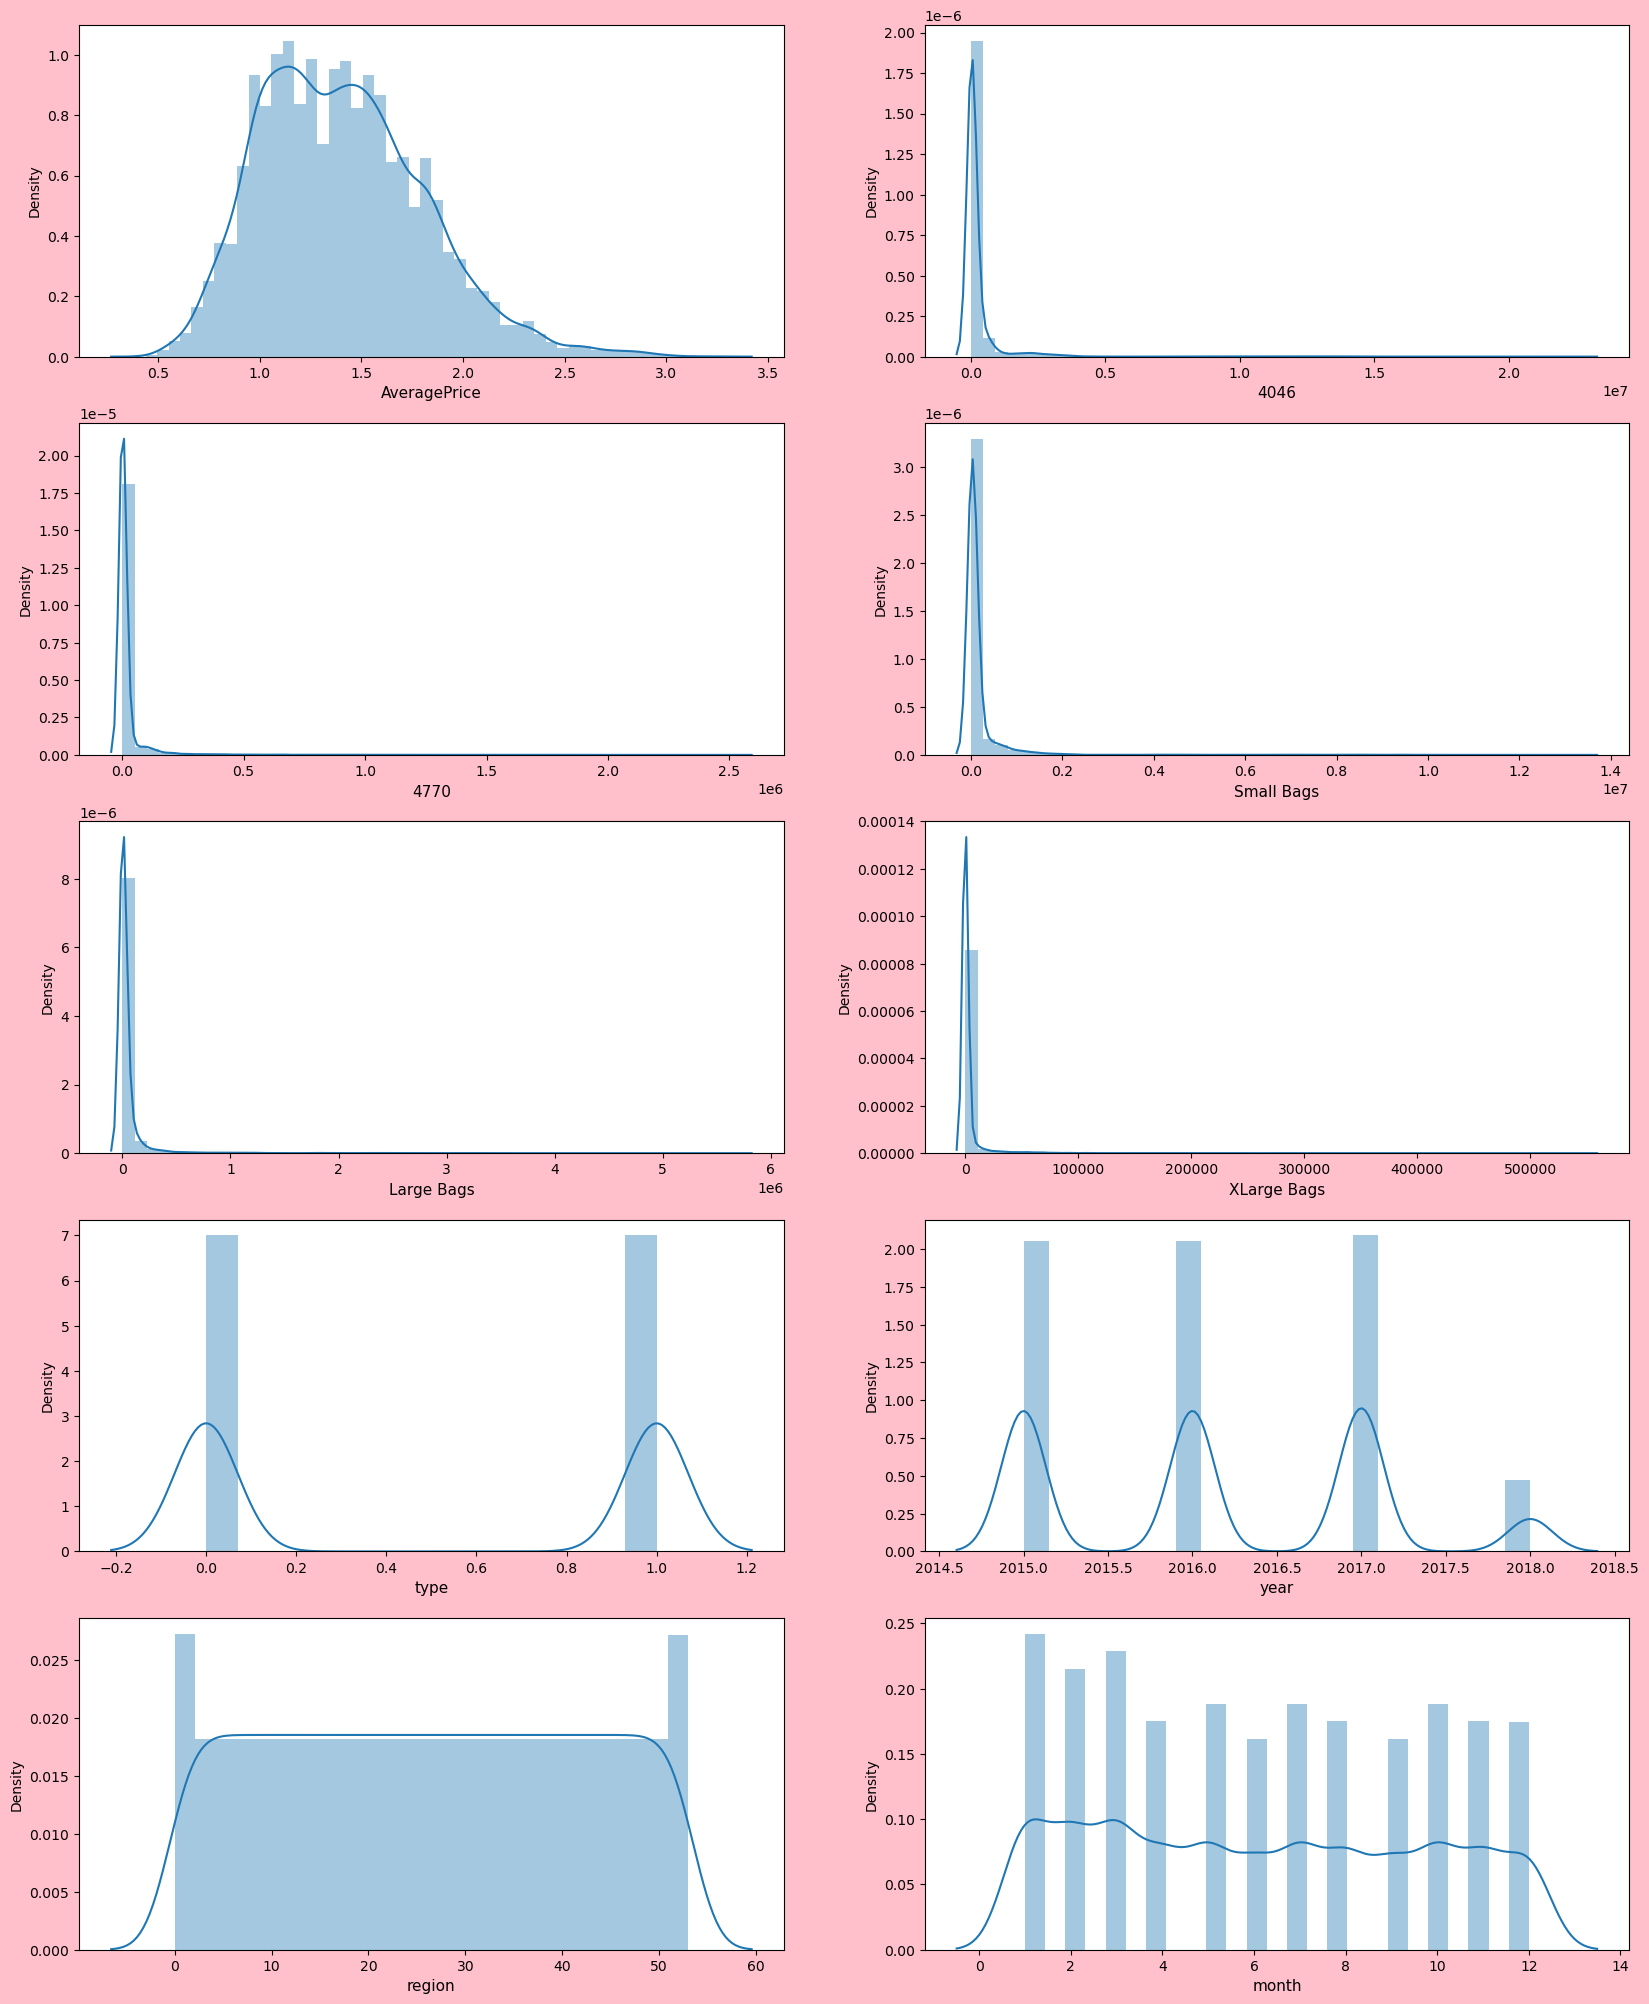

In [59]:
plt.figure(figsize=(20,25),facecolor='pink')
pn=1
for c in df:
    if pn<=10:
        ax=plt.subplot(5,2,pn)
        sns.distplot(df[c])
        plt.xlabel(c,fontsize=11)
    pn+=1

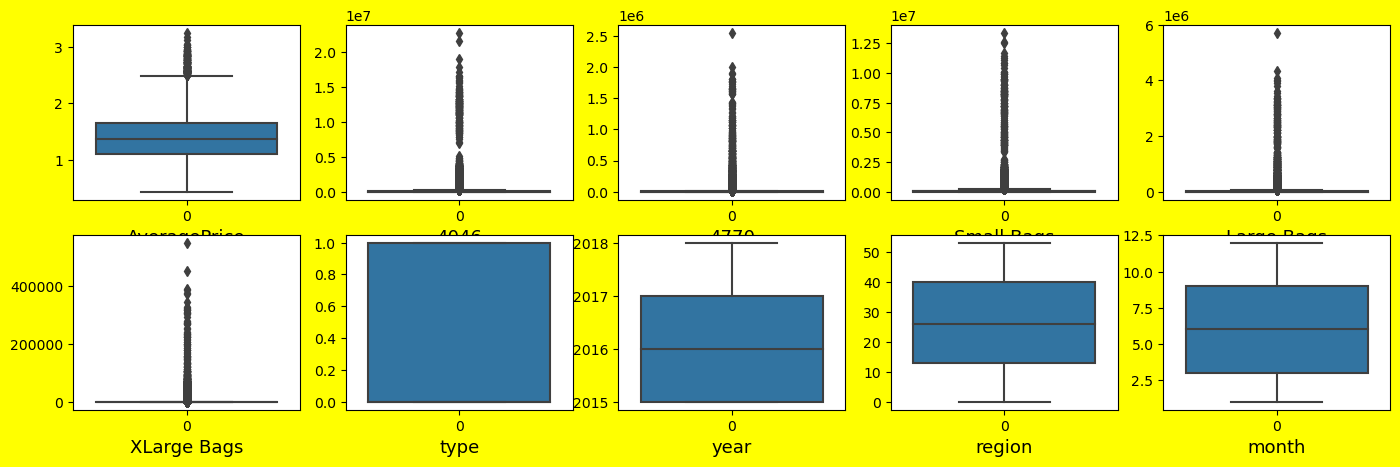

In [62]:
plt.figure(figsize=(17,5),facecolor='yellow')
p=1
for c in df:
    if p<=10:
        ax=plt.subplot(2,5,p)
        sns.boxplot(df[c])
        plt.xlabel(c,fontsize=13)
    p+=1

There are outliers present in the dataset, so we will deal with them first.

In [63]:
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(df))
z.shape

(18249, 10)

In [64]:
threshold=3
print(np.where(z>3))
df1=df[(z<3).all(axis=1)]
df1.shape

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([1, 1, 5, ..., 0, 0, 0], dtype=int64))


(17659, 10)

In [97]:
(18249-17659)/18249*100

3.233053865965258

There is a data loss of 3.23% after removing the outliers.

In [65]:
df1.head()

,AveragePrice,4046,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,1036.74,48.16,8603.62,93.25,0.0,0,2015,0,12
1,1.35,674.28,58.33,9408.07,97.49,0.0,0,2015,0,12
2,0.93,794.70,130.50,8042.21,103.14,0.0,0,2015,0,12
3,1.08,1132.00,72.58,5677.40,133.76,0.0,0,2015,0,12
4,1.28,941.48,75.78,5986.26,197.69,0.0,0,2015,0,11


There is skewness present in the dataset

In [98]:
for col in df.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(df1[col])

KeyError: 'XLarge Bags'

In [67]:
df1.skew()

AveragePrice    0.378061
4046           -0.420932
4770            0.067791
Small Bags     -0.787622
Large Bags     -0.611103
XLarge Bags     1.215876
type           -0.036818
year            0.230232
region          0.012548
month           0.107500
dtype: float64

In [68]:
df1.drop(columns=['XLarge Bags'],inplace=True)

In [74]:
X = df1.drop('AveragePrice', axis=1)
Y = df1['AveragePrice']

In [84]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [75]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head(10)

,4046,4770,Small Bags,Large Bags,type,year,region,month
0,-0.587766,-0.246722,-0.216469,-0.648736,-1.018577,-1.209892,-1.695951,1.644501
1,-0.719911,-0.199959,-0.180286,-0.637004,-1.018577,-1.209892,-1.695951,1.644501
2,-0.669444,-0.002023,-0.243785,-0.622132,-1.018577,-1.209892,-1.695951,1.644501
3,-0.560755,-0.146425,-0.384736,-0.553411,-1.018577,-1.209892,-1.695951,1.644501
4,-0.617378,-0.135838,-0.363293,-0.449899,-1.018577,-1.209892,-1.695951,1.362025
5,-0.546885,-0.270876,-0.326464,-0.566217,-1.018577,-1.209892,-1.695951,1.362025
6,-0.502357,-0.084827,-0.236077,-0.577647,-1.018577,-1.209892,-1.695951,1.362025
7,-0.706774,-0.122531,-0.344752,-0.172039,-1.018577,-1.209892,-1.695951,1.362025
8,-0.592120,-0.106653,-0.113175,-0.353880,-1.018577,-1.209892,-1.695951,1.362025
9,-0.651539,-0.037539,-0.242817,-0.171056,-1.018577,-1.209892,-1.695951,1.079549


In [79]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.5052640704223514 on Random State 978


In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=978)

In [81]:
models=[LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),DecisionTreeRegressor(), SVR()]

In [85]:
for m in models:
    m.fit(X_train,Y_train)
    mpred=m.predict(X_test)
    print('For',m)
    print("R2 score :",r2_score(Y_test, mpred))
    print("Mean absolute error: ", mean_absolute_error(Y_test,mpred))
    print("Mean squared error: ", mean_squared_error(Y_test,mpred),'\n')

For LinearRegression()
R2 score : 0.5052640704223514
Mean absolute error:  0.21764530892885364
Mean squared error:  0.07573848042016594 

For RandomForestRegressor()
R2 score : 0.8852619608457983
Mean absolute error:  0.09465023782559456
Mean squared error:  0.01756509728199321 

For KNeighborsRegressor()
R2 score : 0.8478131475871704
Mean absolute error:  0.10780067950169876
Mean squared error:  0.023298087429218572 

For DecisionTreeRegressor()
R2 score : 0.7551556767486236
Mean absolute error:  0.12735220838052094
Mean squared error:  0.03748289920724802 

For SVR()
R2 score : 0.7642381577136466
Mean absolute error:  0.14251024655262123
Mean squared error:  0.036092474001374726 



RandomForest Regressor is the best model of all. 

In [88]:
rfr=RandomForestRegressor()
fmodel=rfr.fit(X_train, Y_train)
fmod_pred = rfr.predict(X_test)
fmod_acc = (r2_score(Y_test, fmod_pred))*100
print('Accuracy of our best model is:',fmod_acc)

Accuracy of our best model is: 88.67712578085806


In [89]:
print('predicted values:-',mpred)
print('actual values:-',Y_test)

predicted values:- [1.19172251 1.36059982 1.34838988 ... 1.61397252 1.29870312 2.05748715]
actual values:- 8311     1.29
13686    1.38
13091    1.47
3376     0.89
4629     1.06
         ... 
5315     1.30
7221     1.59
7123     1.55
10094    1.25
15135    2.00
Name: AveragePrice, Length: 4415, dtype: float64


In [90]:
d1=pd.DataFrame({'predicted values':mpred,'actual values':Y_test})
d1

,predicted values,actual values
8311,1.191723,1.29
13686,1.360600,1.38
13091,1.348390,1.47
3376,0.923185,0.89
4629,1.026046,1.06
...,...,...
5315,1.217924,1.30
7221,1.547565,1.59
7123,1.613973,1.55
10094,1.298703,1.25


In [95]:
import joblib
joblib.dump(rfr,'avocado_avg_price')

['avocado_avg_price']

In [96]:
m = joblib.load("avocado_avg_price")
print(m.predict(X_test))

[1.1647 1.4398 1.4411 ... 1.5956 1.2563 2.0944]
